In [ ]:
pip install kagglehub


In [190]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the path to the file you'd like to load
file_path = "amazon_sales_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aliiihussain/amazon-sales-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/jr/v5l530tn1zngf7xj6fw7gym40000gn/T/ipykernel_93206/3889703892.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    order_id  order_date  product_id product_category   price  \
0         1  2022-04-13        2637            Books  128.75   
1         2  2023-03-12        2300          Fashion  302.60   
2         3  2022-09-28        3670           Sports  495.80   
3         4  2022-04-17        2522            Books  371.95   
4         5  2022-03-13        1717           Beauty  201.68   

   discount_percent  quantity_sold customer_region payment_method  rating  \
0                10              4   North America            UPI     3.5   
1                20              5            Asia    Credit Card     3.7   
2                20              2          Europe            UPI     4.4   
3                15              4     Middle East            UPI     5.0   
4                 0              4     Middle East            UPI     4.6   

   review_count  discounted_price  total_revenue  
0           443            115.88         463.52  
1           475            242.08

In [27]:
df.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [29]:
df.isna().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [148]:
X = df.drop(['total_revenue', 'order_id', 'product_id', 'order_date', 'discounted_price'], axis=1)
y = df['total_revenue']

In [149]:
X

,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count
0,Books,128.75,10,4,North America,UPI,3.5,443
1,Fashion,302.60,20,5,Asia,Credit Card,3.7,475
2,Sports,495.80,20,2,Europe,UPI,4.4,183
3,Books,371.95,15,4,Middle East,UPI,5.0,212
4,Beauty,201.68,0,4,Middle East,UPI,4.6,308
...,...,...,...,...,...,...,...,...
49995,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386
49996,Beauty,294.23,10,5,Asia,Credit Card,3.1,8
49997,Electronics,352.11,30,4,Asia,Debit Card,3.1,104
49998,Beauty,307.54,5,1,Middle East,UPI,1.8,316


In [150]:
y

0         463.52
1        1210.40
2         793.28
3        1264.64
4         806.72
          ...   
49995     134.95
49996    1324.05
49997     985.92
49998     292.16
49999     177.41
Name: total_revenue, Length: 50000, dtype: float64

In [151]:
cat_columns = X.select_dtypes(include=['object']).columns

In [152]:
cat_columns

Index(['product_category', 'customer_region', 'payment_method'], dtype='object')

In [153]:
len(X.columns)

8

In [154]:
num_columns = X.select_dtypes(include = ['float64','int64']).columns

In [155]:
num_columns

Index(['price', 'discount_percent', 'quantity_sold', 'rating', 'review_count'], dtype='object')

In [156]:
for i in range(len(X.columns)) : 
   col = X.columns[i]
   x = X[col].nunique()
   print(x)

6
31465
6
5
4
5
41
500


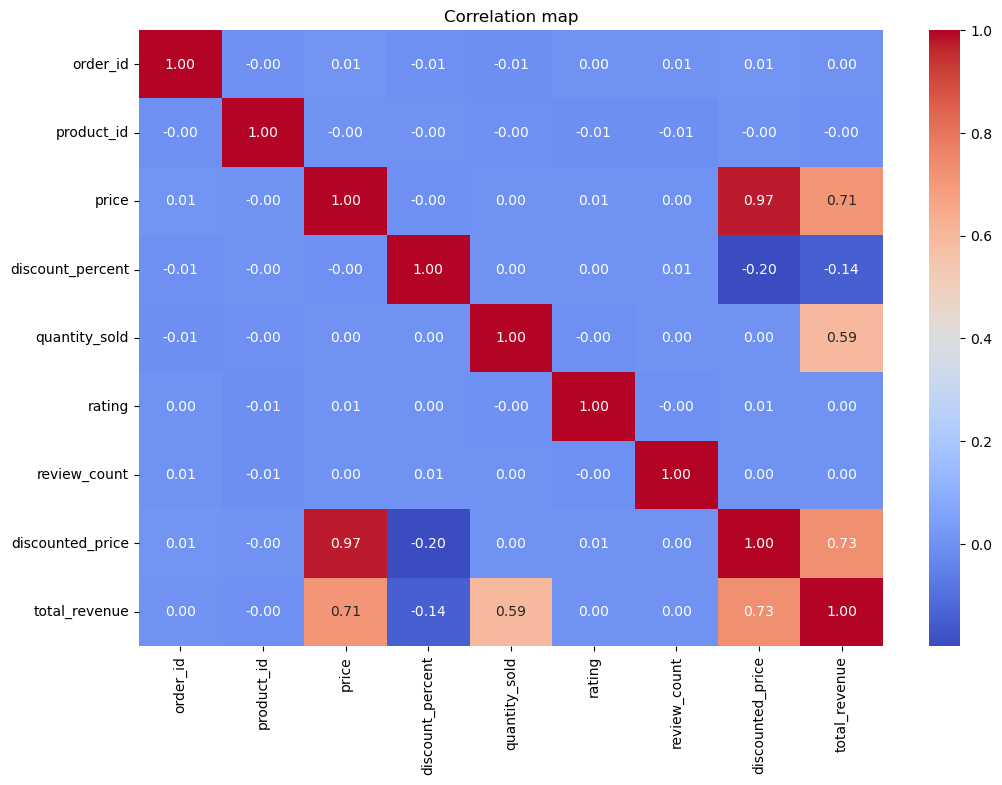

In [193]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation map' )
plt.show()

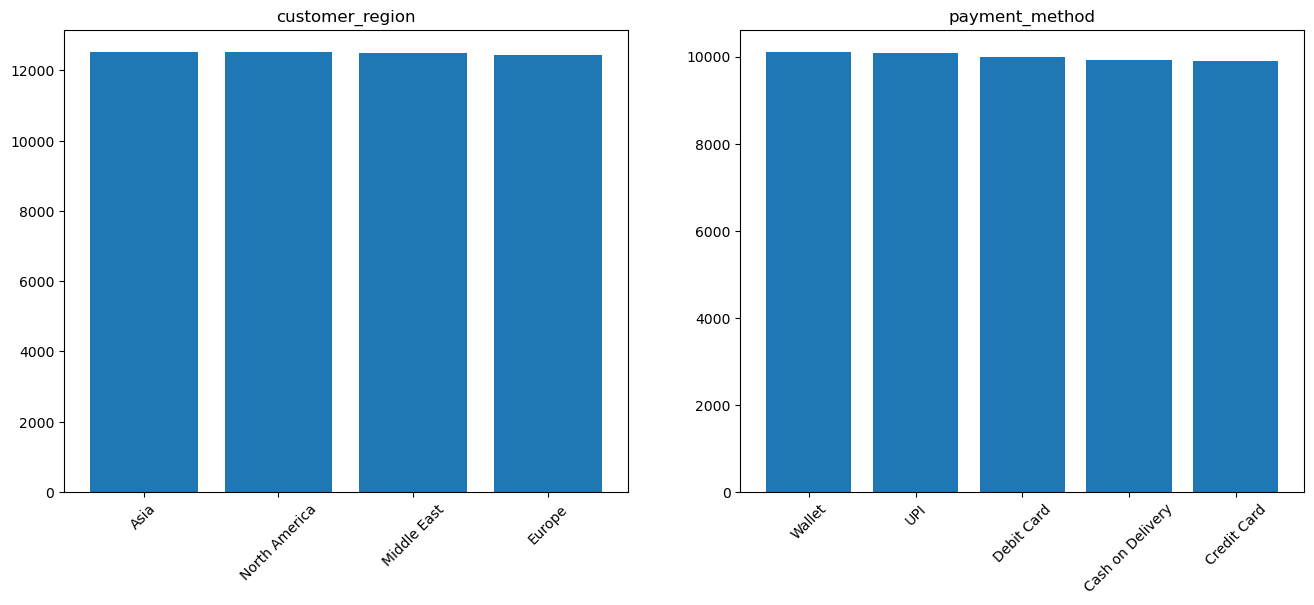

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.flatten()
for i, col in enumerate(cat_columns[1:]):
    counts = df[col].value_counts()
    
    ax[i].bar(counts.index.astype(str), counts.values)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=45)

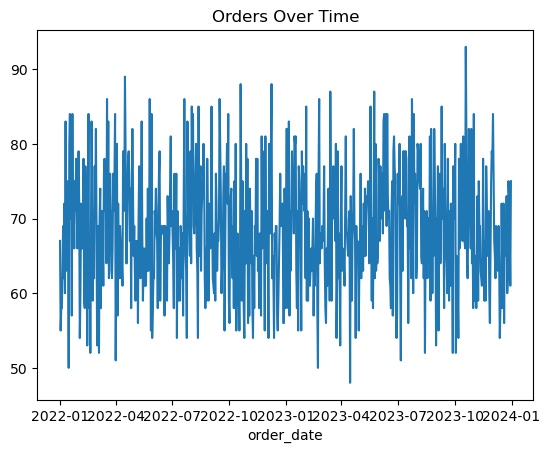

In [161]:
df['order_date'] = pd.to_datetime(df['order_date'])

df.groupby(df['order_date'].dt.date).size().plot()
plt.title("Orders Over Time")
plt.show()

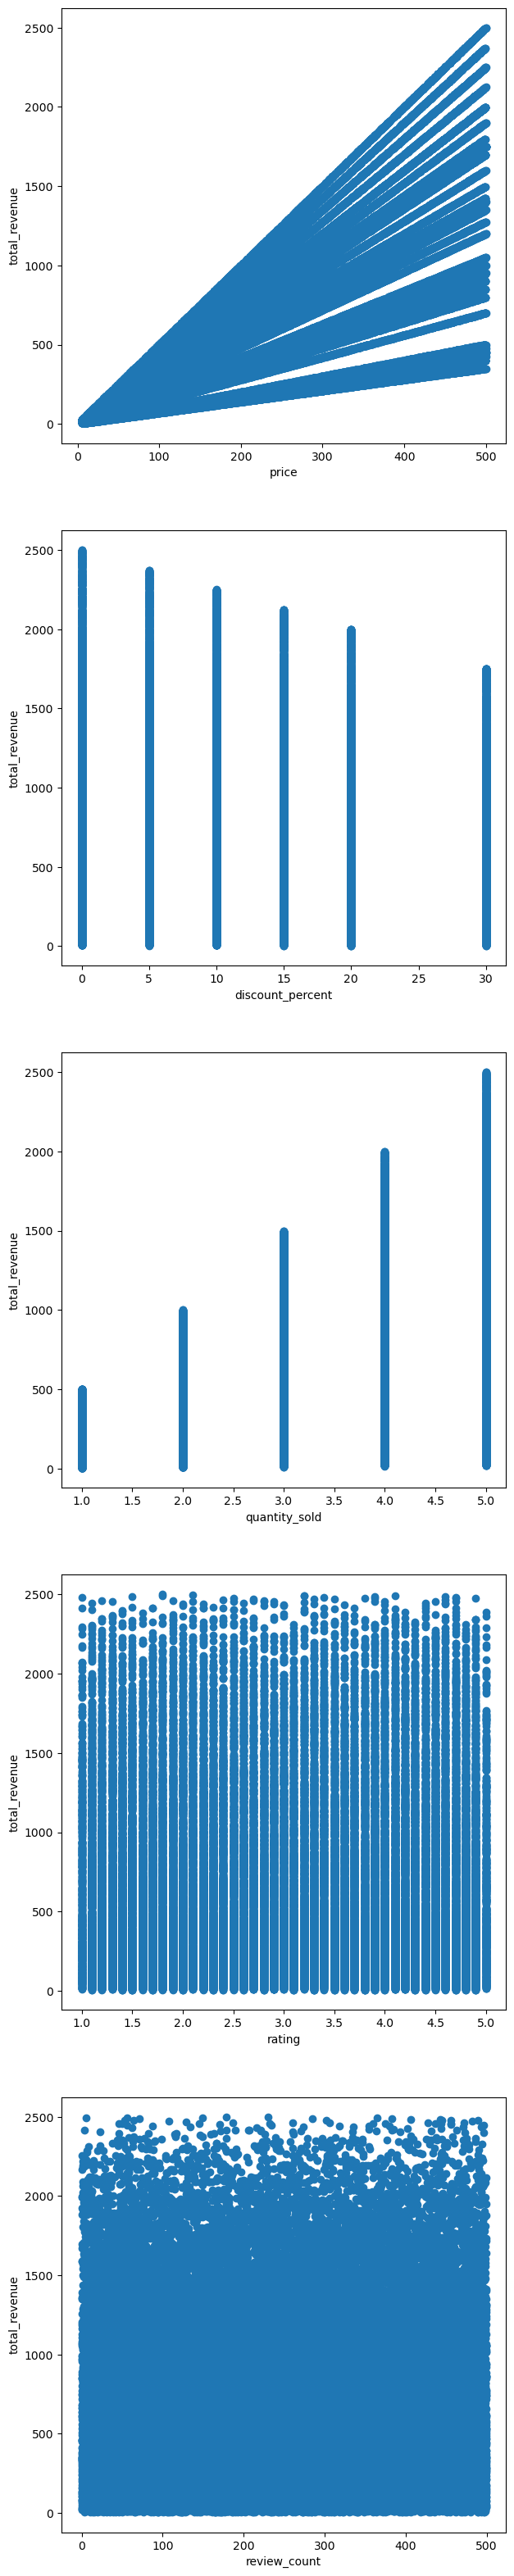

In [163]:
fig , ax = plt.subplots(5,1,figsize =(7,40))
ax = ax.flatten()

for i,col in enumerate(num_columns): 
    ax[i].scatter(df[col],y)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel(y.name)

In [164]:
X = pd.get_dummies(X, columns=cat_columns, drop_first=True)

In [165]:
X

,price,discount_percent,quantity_sold,rating,review_count,product_category_Books,product_category_Electronics,product_category_Fashion,product_category_Home & Kitchen,product_category_Sports,customer_region_Europe,customer_region_Middle East,customer_region_North America,payment_method_Credit Card,payment_method_Debit Card,payment_method_UPI,payment_method_Wallet
0,128.75,10,4,3.5,443,True,False,False,False,False,False,False,True,False,False,True,False
1,302.60,20,5,3.7,475,False,False,True,False,False,False,False,False,True,False,False,False
2,495.80,20,2,4.4,183,False,False,False,False,True,True,False,False,False,False,True,False
3,371.95,15,4,5.0,212,True,False,False,False,False,False,True,False,False,False,True,False
4,201.68,0,4,4.6,308,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,26.99,0,5,2.4,386,False,False,False,False,False,False,True,False,True,False,False,False
49996,294.23,10,5,3.1,8,False,False,False,False,False,False,False,False,True,False,False,False
49997,352.11,30,4,3.1,104,False,True,False,False,False,False,False,False,False,True,False,False
49998,307.54,5,1,1.8,316,False,False,False,False,False,False,True,False,False,False,True,False


In [166]:
X.dtypes

price                              float64
discount_percent                     int64
quantity_sold                        int64
rating                             float64
review_count                         int64
product_category_Books                bool
product_category_Electronics          bool
product_category_Fashion              bool
product_category_Home & Kitchen       bool
product_category_Sports               bool
customer_region_Europe                bool
customer_region_Middle East           bool
customer_region_North America         bool
payment_method_Credit Card            bool
payment_method_Debit Card             bool
payment_method_UPI                    bool
payment_method_Wallet                 bool
dtype: object

In [167]:
X = X.astype(int)

In [168]:
X

,price,discount_percent,quantity_sold,rating,review_count,product_category_Books,product_category_Electronics,product_category_Fashion,product_category_Home & Kitchen,product_category_Sports,customer_region_Europe,customer_region_Middle East,customer_region_North America,payment_method_Credit Card,payment_method_Debit Card,payment_method_UPI,payment_method_Wallet
0,128,10,4,3,443,1,0,0,0,0,0,0,1,0,0,1,0
1,302,20,5,3,475,0,0,1,0,0,0,0,0,1,0,0,0
2,495,20,2,4,183,0,0,0,0,1,1,0,0,0,0,1,0
3,371,15,4,5,212,1,0,0,0,0,0,1,0,0,0,1,0
4,201,0,4,4,308,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,26,0,5,2,386,0,0,0,0,0,0,1,0,1,0,0,0
49996,294,10,5,3,8,0,0,0,0,0,0,0,0,1,0,0,0
49997,352,30,4,3,104,0,1,0,0,0,0,0,0,0,1,0,0
49998,307,5,1,1,316,0,0,0,0,0,0,1,0,0,0,1,0


In [169]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [170]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [177]:
scaler = StandardScaler()

In [178]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
linear_model = LinearRegression()

In [180]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [181]:
y_predicted1 = linear_model.predict(X_test_scaled)

In [182]:
mean_squared_error(y_test,y_predicted1)

34692.01752806411

In [184]:
tree_model = DecisionTreeRegressor(max_depth=5,
    min_samples_split=10,
    random_state=42)

In [185]:
tree_model.fit(X_train_scaled , y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [186]:
y_predicted2 = tree_model.predict(X_test_scaled)

In [187]:
mean_squared_error(y_test , y_predicted2)

10811.583700510912

In [183]:
r2_score(y_test, y_predicted1)


0.8722518661673877

In [188]:
r2_score(y_test, y_predicted2)

0.9601879700309136